# Практическая работа №3: Статистический анализ социальных сетей
Выполнил студент гр. 0383 Парфенов Владислав. Вариант №58

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
**Диада** $-$ элемент сети, представляющий собой пару акторов и (возможную) связь между ними: $D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** $-$ тройка чисел $M, A, N$, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = C^2_g - A - M$

**Индекс взаимности Каца-Пауэлла** (Reciprocity of Katz and Powell) $-$ характеристика измерения тенденции акторов в группе. Данный индекс оценивает тенденцию акторов в группе к взаимному выбору друг друга. 

$-\infty < \rho_{кр} \leqslant 1$.

Если $\rho_{кр} = 0$, то акторы не имеют склонности взаимно выбирать друг друга.

Если $\rho_{кр} = 1$, то акторы показывают максимальную тенденцию к взаимному выбору друг друга.

Если $\rho_{кр} < 0$, то акторы склонны образовывать односторонние связи или не образовывать их вообще.

Индекс взаимности основан на ожидании количества взаимных диад, предполагая, что выбор делается акторами случайным образом. Выбор может быть фиксированным или свободным.

Для фиксированного выбора из $d$ акторов:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)M - gd^2}{gd(g - d - 1)}}$.

Вероятность того, что связь будет взаимной для двух акторов:

$\displaystyle{P(i \rightarrow j \wedge j \rightarrow i) = \frac{d}{g - 1}\left( \frac{d}{g - 1} + \rho_{кр} \frac{g - 1 - d}{g - 1} \right)}.$

Для свободного выбора:

По методу моментов оценка $\hat{\rho}_{кр} = \displaystyle{\frac{2(g-1)^2M - L^2 + L_2}{L(g - 1)^2 - L^2 - L_2}}$.

Вероятность того, что связь будет взаимной для двух акторов (для каждого из акторов):

$P = \displaystyle{\frac{x_{i+}x_{j+}}{(g - 1)^2}}.$

**Индекс взаимности Бандиопадхьяйя** $-$ индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}},$

где $M_{\min} = \max f(t), 0 \leqslant t \leqslant g$, 

$M_{\max} = \lfloor 0.5 \sum^g_{i = 1} x_{i+} - \max g(t)\rfloor, 0 \leqslant t \leqslant g,$

$f(t) = \sum^t_{i=1} x_{i+} - t(g - 1) - C^2_g,$

$g(t) = \sum^t_{i=1} x_{i+} - t(t - 1) - \sum^g_{i=t+1} \min (t, x_{i+}).$

**Вычисление доверительного интервала для оценки P.**

Оценка параметра $P$:

$\hat{P} = \displaystyle{\frac{\sum_{i = 1}^g \sum_{j = 1}^g x_{ij}}{g(g-1)} = \frac{l}{g(g - 1)}}.$

Доверительный интервал: $\hat{P}_{lower} \leqslant P \leqslant \hat{P}_{upper}$.

$\hat{P}_{lower} = \displaystyle{\hat{P} - z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$\hat{P}_{lower} = \displaystyle{\hat{P} + z_{\alpha/2} \sqrt\frac{\hat{P}(1- \hat{P})}{g(g-1)}}$

$z_{\alpha/2}$ вычисляется из $\Phi(z_{\alpha/2}) = 0.5 - 0.5 \alpha$, где $\alpha - $ некоторый уровень значимости, $(1 - \alpha) - $ доверительная надёжность.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

0. Для начала необходимо установить некоторые библиотеки.

In [ ]:
library(igraph)
library(statnet)

1. С помощью библиотеки igraph смоделировать случайный орграф $\mathscr{G}_d$ на основе модели Эрдеша-Реньи: $\mathscr{G}_d = \mathscr{G}_d(g, p)$, где $g$ - количество акторов, $p$ - вероятность появления дуги между акторами. Данные для варианта 58: $g = 93, p = 0.75$.

In [ ]:
set.seed(1)

g <- 93
p <- 0.75

gr <- erdos.renyi.game(g, p, "gnp", directed = TRUE)
net <- network(as_adjacency_matrix(gr), directed = TRUE)

2. Отобразить полученный орграф.

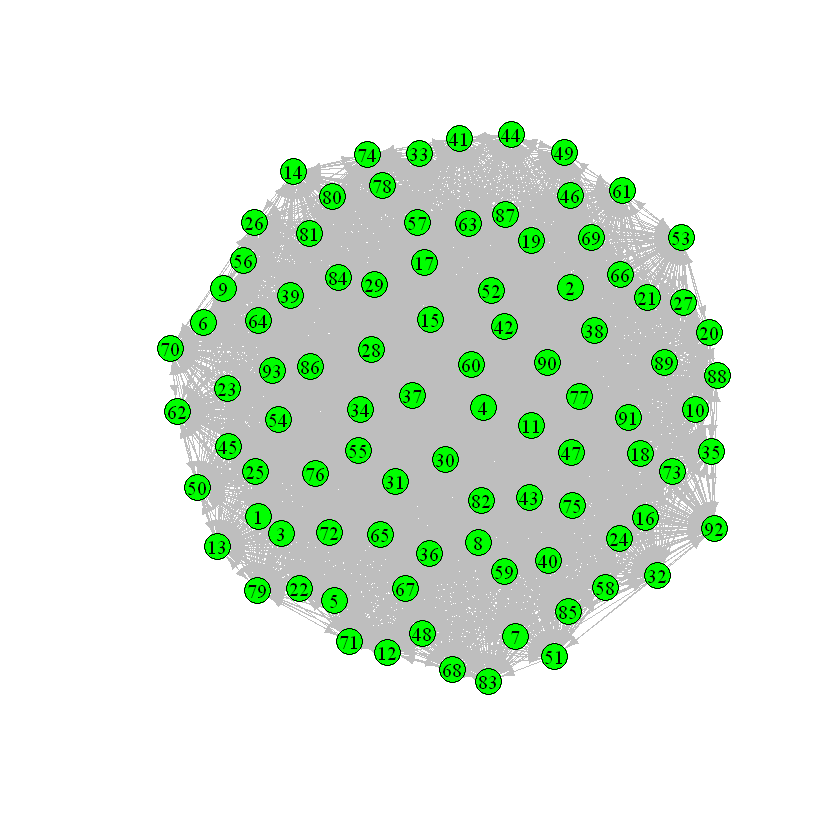

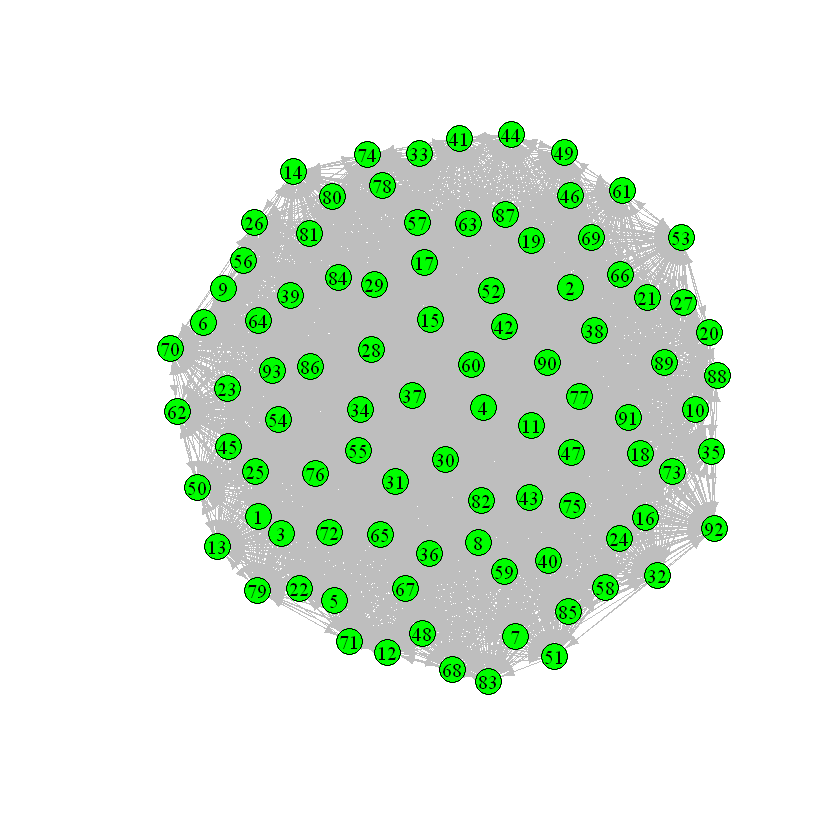

In [3]:
plot(
    gr, 
     layout = layout_with_fr, 
     vertex.label = V(gr)$name,
     vertex.size = 10, 
     edge.arrow.size=.5,
     edge.arrow.color = "red", 
     vertex.color= "green",
     vertex.label.color = "black", 
     edge.color = "grey"
)

3. Вычислить "пятичисловую сводрку" для графа $\mathscr{G}_d$.

In [4]:

cat("Размер - ", network.size(net), "\n")

##Плотность
cat("Плотность - ", gden(net), "\n")

##Компоненты
cat("Число компонент - ", components(net), "\n")

##Диаметр сети
cat("Диаметр - ", diameter(gr), "\n")

##Коэффициент кластеризации
cat("Коэффициент кластеризации - ", gtrans(net, mode = "graph"), "\n")

Размер -  93 
Размер -  93 
Плотность -  0.7445068 
Плотность -  0.7445068 
Число компонент -  1 
Число компонент -  1 
Диаметр -  2 
Диаметр -  2 
Коэффициент кластеризации -  0.7437583 
Коэффициент кластеризации -  0.7437583 


4. Вычислить цензус диад. Сделать выводы.

In [5]:
census <- dyad_census(gr)
cat("Цензус:\n")
census

Цензус:
Цензус:


$mut
[1] 2377

$asym
[1] 1616

$null
[1] 285

$mut
[1] 2377

$asym
[1] 1616

$null
[1] 285

Можно сделать вывод
Число взаимных диад (двунаправленных отношений) M = 2377

Число ассиметричных диад (однонаправленных отношений) А равно 1616.

Число пар акторов N, между которыми нет связи, равно 285.

5. Вычислить оценку индекса взаимности Каца-Пауэла при фиксированном выборе акторов d и при свободном выборе. Сделать выводы.
Допустим d = 60, каждый актор выбирает из g - 1 = 93 - 1 = 92 акторов.

In [6]:
d <- 60
M <- census$mut

w <- (2*(g-1)*M - g * d^2)/(g*d*(g - 1 - d))

w

[1] 0.5744176

[1] 0.5744176

При фиксированном выборе акторы склонны образовывать взамные связи. 

Далее представлено вычисление при свободном выборе.

In [7]:
adj_matrix <- as.matrix(as_adjacency_matrix(gr))

L <- sum(rowSums(adj_matrix))
L2 <- sum(rowSums(adj_matrix) ^ 2)

w2 <- (2 *(g - 1)^2 * M - L ^ 2 + L2)/(L * (g - 1)^2 - L^2 + L2)
w2

[1] 0.0071622

[1] 0.0071622

Результат получился ближе к 0, так что акторы скорее не имеют склонности взаимно выбирать друг друга.

6. Вычислить вероятность того, что связь будет взаимной для каждого случая.

Для фиксированного:

In [8]:
P_bond_is_fixed <- (d / (g - 1)) * ((d /(g - 1)) + w *(g - 1 - d) / (g - 1))
P_bond_is_fixed

[1] 0.5556335

[1] 0.5556335

Для свободного выбора

In [9]:
P_bond_is_fixed_free <- (rowSums(adj_matrix) * colSums(adj_matrix))/(g - 1)^2
P_bond_is_fixed_free_avg <- sum(P_bond_is_fixed_free)/ g
P_bond_is_fixed_free_avg

[1] 0.5544101

[1] 0.5544101

7. Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [10]:
gf <- function(row_sum, g, t) {
    xi_sum <- sum(row_sum[1:t])
    min_sum <- 0   
    for (i in (t+1):g) {
        min_sum <- min_sum + min(c(t, row_sum[i]))
    }
    res <- xi_sum - t*(t-1) - min_sum
    return(res)
}
ff <- function(row_sum, g, t) {
    xi_sum <- sum(row_sum[1:t])
    combination <- factorial(t)/(factorial(2) * factorial(t-2))
    res <- xi_sum - t*(g - 1) - combination 
    return(res)
}

row_sum <- rowSums(adj_matrix)

g_res <- rep(2, g - 1)
for (t in 2:(g - 1)) {
    g_res[t] <- gf(row_sum, g, t)
}

f_res <- rep(2, g)
for (t in 2:g) {
    f_res[t] <- ff(row_sum, g, t)
}

maxM <- floor(0.5 * sum(row_sum[1:g]) - max(g_res))
minM <- max(f_res)

indexB <- (M - minM)/(maxM - minM)
indexB

[1] 0.7466206

[1] 0.7466206

Отсюда видно, что индекс близок к $p = 0.75$.

8. Проверить нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g−1), 𝑃_0), P_0 = 0.70$ при уровне значимости $\alpha = 0.04$. Определить максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [11]:
alpha <- 0.04
p0 <- 0.70

s <- sum(adj_matrix)
binom.test(s, g *(g - 1), p = 0.5)


	Exact binomial test

data:  s and g * (g - 1)
number of successes = 6370, number of trials = 8556, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.7351247 0.7537221
sample estimates:
probability of success 
             0.7445068 



	Exact binomial test

data:  s and g * (g - 1)
number of successes = 6370, number of trials = 8556, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.7351247 0.7537221
sample estimates:
probability of success 
             0.7445068 


Здесь можно видеть, что p-value много меньше p-value $< 2.2 \cdot 10^{-16}$. Получается, что нулевая гипотеза не выполняется, вероятность успеха (что подразумевает собой построение ребра между двумя акторами) не равна 0.5. p-value - максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

9. Проверим нулевую гипотезу о том, что число дуг $L$ в орграфе $\mathscr{G}_d$ имеет биномиальное распределение $L ∼ Bin(g(g−1), 𝑃_0), P_0 = 0.70$ при уровне значимости $\alpha = 0.04$. Определим максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

In [12]:
p0 <- 0.70

binom.test(s, g *(g - 1), p = p0)


	Exact binomial test

data:  s and g * (g - 1)
number of successes = 6370, number of trials = 8556, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.7
95 percent confidence interval:
 0.7351247 0.7537221
sample estimates:
probability of success 
             0.7445068 



	Exact binomial test

data:  s and g * (g - 1)
number of successes = 6370, number of trials = 8556, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.7
95 percent confidence interval:
 0.7351247 0.7537221
sample estimates:
probability of success 
             0.7445068 


Здесь можно видеть, что p-value много меньше p-value $< 2.2 \cdot 10^{-16}$. Получается, что нулевая гипотеза не выполняется, вероятность успеха (что подразумевает собой построение ребра между двумя акторами) не равна 0.7. p-value - максимальный уровень значимости, при котором нулевая гипотеза не отвергается.

10. Построить доверительный интервал для оценки параметра $p$ с доверительной надёжностью $(1 - \alpha)$. Сделать выводы.

In [13]:
p_dov <- (sum(adj_matrix))/(g *(g - 1))
p_dov

[1] 0.7445068

[1] 0.7445068

Необходимо также найти $z_{\alpha/2}$. Это можно сделать, если посчитать значения функции Лапласа.

In [14]:
laplace <- 0.5 - (alpha / 2)
laplace

[1] 0.48

[1] 0.48

По таблице значений функции Лапласа получаем $z_{\alpha/2} \approx 2.32$.

In [15]:
z_a <- 2.32

p_lower <- p_dov - z_a * sqrt((p_dov * (1 - p_dov))/(g * (g - 1)))
p_upper <- p_dov + z_a * sqrt((p_dov * (1 - p_dov))/(g * (g - 1)))                      
p_lower
p_upper

[1] 0.7335678

[1] 0.7335678

[1] 0.7554458

[1] 0.7554458

В ходе решения получен интервал $0.73 \leqslant p \leqslant 0.755$. Зная, что $p = 0.75$, можно сделать вывод, что доверительный интервал вычислен точно с доверительной надежностью $(1 - \alpha)$.

## Выводы

В ходе данной практической работы был проведен статистический анализ случайно созданного ориентированного графа с использованием библиотек igraph, statnet, а также встроенных функций языка R. Были получены навыки работы оценкой параметров, нахождения доверительных интервалов. Во время выполнения пришлось применять навыки, полученные на дисциплине "Статический анализ", а также использовать функции R, предназначенные для этих целей. 